In [1]:
import scanpy as sc
import pandas as pd
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=80, frameon=False, figsize=(20, 10), facecolor='white')

-----
anndata     0.8.0
scanpy      1.9.1
-----
PIL                 9.3.0
backcall            0.2.0
beta_ufunc          NA
binom_ufunc         NA
bottleneck          1.3.5
cffi                1.15.1
cloudpickle         2.0.0
colorama            0.4.6
cycler              0.10.0
cython_runtime      NA
cytoolz             0.12.0
dask                2020.12.0
dateutil            2.8.2
decorator           5.1.1
defusedxml          0.7.1
entrypoints         0.4
h5py                3.7.0
ipykernel           5.3.4
ipython_genutils    0.2.0
ipywidgets          7.6.5
jedi                0.14.1
joblib              1.1.1
jupyter_server      1.23.4
kiwisolver          1.4.4
llvmlite            0.39.1
matplotlib          3.4.2
mkl                 2.4.0
mpl_toolkits        NA
natsort             8.2.0
nbinom_ufunc        NA
numba               0.56.4
numexpr             2.8.4
numpy               1.21.5
packaging           22.0
pandas              1.3.5
parso               0.5.2
pexpect             4.

In [3]:
adata = sc.read_h5ad("MouseBC_int_ann_v3.h5ad")
adata

AnnData object with n_obs × n_vars = 5555 × 31053
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'orig.file', 'animal', 'RNA_snn_res.0.5', 'seurat_clusters', 'dendro_order', 'integrated_snn_res.0.8', 'integrated_snn_res.0.5', 'barcode', 'annotated'
    var: '_index', 'features'

In [4]:
df_test = adata.obs
count_df = df_test.groupby(['seurat_clusters', 'annotated']).size().reset_index(name='count')
count_df = count_df.sort_values('count', ascending=False)
count_df.head(15)

,seurat_clusters,annotated,count
6,0,14,1725
12,1,10,592
19,2,4,483
31,3,6,453
41,4,7,307
50,5,3,283
62,6,11,271
77,8,2,219
70,7,5,171
99,11,8,112


In [5]:
adata.var.index = adata.var['_index']
adata.var.index

Index(['XKR4', 'GM37381', 'RP1', 'SOX17', 'GM37323', 'MRPL15', 'RGS20',
       'NPBWR1', '4732440D04RIK', 'GM26901',
       ...
       'GM28406', 'GM29436', 'GM28407', 'GM29393', 'GM21294', 'GM28672',
       'GM28670', 'GM29504', 'GM20837', 'GM47283'],
      dtype='object', name='_index', length=31053)

In [6]:
adata

AnnData object with n_obs × n_vars = 5555 × 31053
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'orig.file', 'animal', 'RNA_snn_res.0.5', 'seurat_clusters', 'dendro_order', 'integrated_snn_res.0.8', 'integrated_snn_res.0.5', 'barcode', 'annotated'
    var: '_index', 'features'

In [7]:
df = pd.DataFrame.sparse.from_spmatrix(adata.X)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,31043,31044,31045,31046,31047,31048,31049,31050,31051,31052
0,1.708522,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,2.684568,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,1.176548,0.0,0.0,0.0,0.0,1.176548,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.850446
4,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [8]:
df.columns = adata.var.index
df.index = adata.obs.annotated
df.head()

_index,XKR4,GM37381,RP1,SOX17,GM37323,MRPL15,RGS20,NPBWR1,4732440D04RIK,GM26901,...,GM28406,GM29436,GM28407,GM29393,GM21294,GM28672,GM28670,GM29504,GM20837,GM47283
annotated,,,,,,,,,,,,,,,,,,,,,
6,1.708522,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
5,2.684568,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
14,1.176548,0.0,0.0,0.0,0.0,1.176548,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
14,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.850446
1,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [9]:
df.to_pickle('bc_df.pkl')

In [10]:
df = pd.read_pickle('bc_df.pkl')
df = df.T

Text(0, 0.5, 'log(CV)')

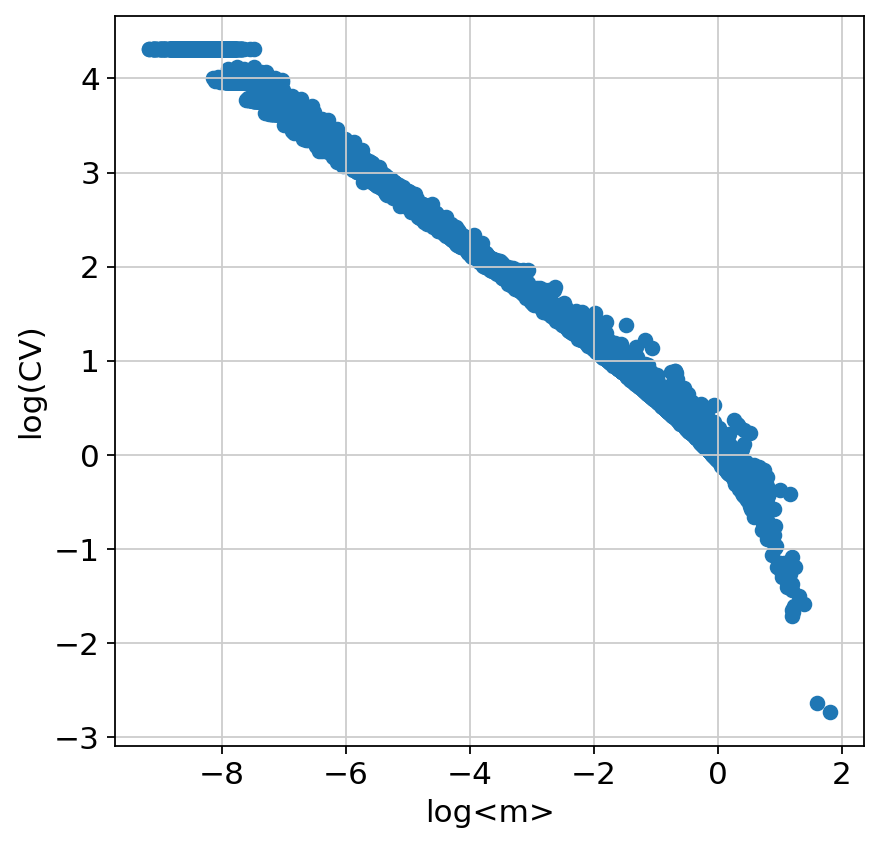

In [11]:
df = df[df.sum(axis = 1) != 0]
gene_log_mean = np.log(df.mean(axis = 1))
gene_log_cv = np.log(df.std(axis = 1)/df.mean(axis = 1))
plt.figure(figsize=(6,6))
plt.scatter(gene_log_mean, gene_log_cv)
plt.xlabel('log<m>')
plt.ylabel('log(CV)')

Text(0, 0.5, 'log(CV)')

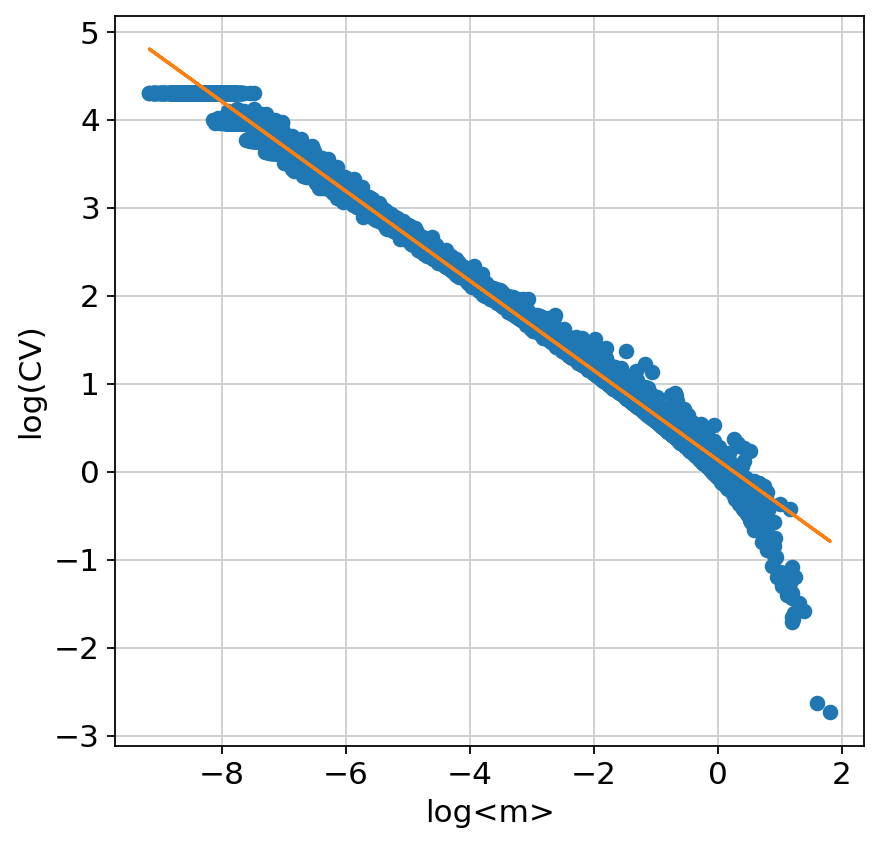

In [12]:
slope, intercept, r_val , p_val, std_err = stats.linregress(gene_log_mean, gene_log_cv)
plt.figure(figsize=(6,6))
plt.plot(gene_log_mean, gene_log_cv, 'o', gene_log_mean, slope*gene_log_mean + intercept)
plt.xlabel('log<m>')
plt.ylabel('log(CV)')

In [13]:
gene_selected_logcv = gene_log_cv[gene_log_cv > (slope * gene_log_mean + intercept)]
selected_gene_idx = gene_selected_logcv.index
print (selected_gene_idx)

Index(['XKR4', 'RP1', 'SOX17', 'RGS20', '4732440D04RIK', 'GM26901', 'SNTG1',
       'MYBL1', 'PPP1R42', 'CPA6',
       ...
       'MID1', 'GM21887', 'ASMT', 'ZFY1', 'USP9Y', 'GM21704', 'KDM5D',
       'GM29650', 'GM28919', 'GM47283'],
      dtype='object', name='_index', length=12926)


In [14]:
df = df.T[selected_gene_idx]
df

_index,XKR4,RP1,SOX17,RGS20,4732440D04RIK,GM26901,SNTG1,MYBL1,PPP1R42,CPA6,...,MID1,GM21887,ASMT,ZFY1,USP9Y,GM21704,KDM5D,GM29650,GM28919,GM47283
annotated,,,,,,,,,,,,,,,,,,,,,
6,1.708522,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
5,2.684568,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
14,1.176548,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,1.176548,0.0,0.0,0.000000
14,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,2.850446
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,1.087015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.087015,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
8,2.510073,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
14,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,1.092912,0.0,0.0,1.092912


In [15]:
df.to_pickle('bc_df_gene_selected.pkl')